In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from besos import eppy_funcs as ef, sampling
import os
plt.style.use('bmh')

from utils.idf_utils import set_runperiod, show_runperiod

In [2]:
weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather')
idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')

b = ef.get_building(os.path.join(idf_path, 'smalloffice.idf'))
start = '2020-01-01'
end = '2020-01-08'

print('Before:')
show_runperiod(b)
set_runperiod(b, start=start, end=end)
print('After:')
show_runperiod(b)

Before:
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    ,                         !- Begin Year
    12,                       !- End Month
    31,                       !- End Day of Month
    ,                         !- End Year
    Sunday,                   !- Day of Week for Start Day
    No,                       !- Use Weather File Holidays and Special Days
    No,                       !- Use Weather File Daylight Saving Period
    No,                       !- Apply Weekend Holiday Rule
    Yes,                      !- Use Weather File Rain Indicators
    Yes;                      !- Use Weather File Snow Indicators
]
After:
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    2020,                     !- Begin Year
    1,                        !- End Month
    8,               

In [2]:
import besos
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import seaborn as sns
import pandas as pd
import os
from besos import eppy_funcs as ef, sampling
from besos.evaluator import EvaluatorEP
from besos.parameters import FieldSelector, Parameter, RangeParameter
from besos.problem import EPProblem
from ipywidgets import FloatSlider, interact
from sklearn import linear_model, pipeline
from sklearn.preprocessing import StandardScaler


def besos_run(building):
    '''
    function to test how the model is running
    '''

    parameters = [
        Parameter(
            FieldSelector(
                object_name='NonRes Fixed Assembly Window',
                field_name='Solar Heat Gain Coefficient'
            ),
            value_descriptors=RangeParameter(0.01, 0.99),
        ),
        Parameter(
            FieldSelector('Lights', '*', 'Watts per Zone Floor Area'),
            value_descriptors=RangeParameter(8, 12),
            name='Light Watts/Area',
        ),
        ]

    objectives = ['Electricity:Facility']
    problem = EPProblem(parameters, objectives)

    inputs = sampling.dist_sampler(sampling.lhs, problem, 5)

    print(inputs)
    inputs.describe()

    evaluator = EvaluatorEP(problem, building)
    train = evaluator.df_apply(inputs, keep_input=True)
    train.head()

weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather')
idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')

b = ef.get_building(os.path.join(idf_path, 'smalloffice.idf'))
# b = ef.get_building(os.path.join(idf_path, 'in.idf'))
# besos_run(b)

In [4]:
from besos import eppy_funcs as ep, sampling
import pandas as pd
import os
import opyplus as op

from utils.idf_utils import show_runperiod, set_runperiod

def opyplus_run(idf_path, weather_path, output_dir):
    '''
    test_run
    '''
    # epath = op.get_eplus_base_dir_path((9, 0, 1))

    s = op.simulate(idf_path, weather_path, output_dir)
    
    
    print(s.__dict__)
    print(list(s.__dict__))
    print('resulting eso: ', s.__dict__['_resource_map']['eso'])
    # eso = s.get_out_eso()

    # results = pd.read_csv(os.path.join(output_dir, 'eplus

def get_run_results(results_dir):
    '''
    After a run of opyplus.simulate obtains the

    '''
    pass


idf_dir = os.path.join(os.getcwd(), '..', 'data', 'epm')

idf_path = os.path.join(idf_dir, 'smalloffice.idf')
weather_path = os.path.join(os.getcwd(), '..', 'data',
                            'weather', 'greatfalls.epw')
    
model = ep.get_building(idf_path)
print('runperiod')
show_runperiod(model)
start = '2020-01-01'
end = '2020-01-08'
set_runperiod(model, start=start, end=end)
model.saveas(os.path.join(idf_dir, 'week_simulation.idf'))
idf_path = os.path.join(idf_dir, 'week_simulation.idf')

print('new runperiod')
show_runperiod(model)

out = os.path.join('dump')
opyplus_run(idf_path, weather_path, out)


called Simulation.from_input on a simulation directory that is not empty (dump)


runperiod
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    ,                         !- Begin Year
    12,                       !- End Month
    31,                       !- End Day of Month
    ,                         !- End Year
    Sunday,                   !- Day of Week for Start Day
    No,                       !- Use Weather File Holidays and Special Days
    No,                       !- Use Weather File Daylight Saving Period
    No,                       !- Apply Weekend Holiday Rule
    Yes,                      !- Use Weather File Rain Indicators
    Yes;                      !- Use Weather File Snow Indicators
]
new runperiod
[
RunPeriod,
    ,                         !- Name
    1,                        !- Begin Month
    1,                        !- Begin Day of Month
    2020,                     !- Begin Year
    1,                        !- End Month
    8,      

Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

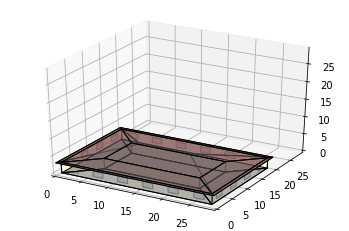

In [9]:
import matplotlib.pyplot as plt

model.view_model()

plt.show()

In [1]:
from besos import eppy_funcs as ef
import besos.sampling as sampling
from besos.problem import EPProblem
from besos.evaluator import EvaluatorEP
from besos.parameters import wwr, RangeParameter, FieldSelector, Parameter

idf_path = os.path.join(os.getcwd(), '..', 'data', 'epm')
idf_file = os.path.join(idf_path, 'smalloffice.idf')

weather_path = os.path.join(os.getcwd(), '..', 'data', 'weather', 'greatfalls.epw')

Relative to World Coordinates:   0%|          | 0/6 [00:00<?, ?it/s]

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x19acc3640d0>)

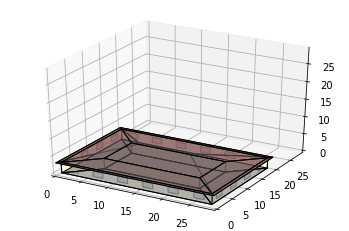

In [2]:
building = ef.get_building(idf_file)
building.view_model()

In [3]:
timeframe = FieldSelector(class_name='RUNPERIOD', object_name='', field_name='End_Month')

parameters = [Parameter(timeframe, value_descriptor=RangeParameter(1, 13), name='Simulation Period')]
parameters.append(wwr(RangeParameter(0.1, 0.9)))

objective = ['Gas:Facility', 'Electricity:Facility']
problem = EPProblem(parameters, objective)


C:\Users\s2216495\AppData\Local\Programs\Python\Python38\lib\site-packages\besos\parameters.py:424: FutureWarning: Use value_descriptors instead of value_descriptor.
  warnings.warn(


In [4]:
evaluator = EvaluatorEP(problem, building, epw=weather_path, progress_bar=True, out_dir='dump')

In [6]:
import numpy as np
import pandas as pd

samples = 20
inputs = sampling.dist_sampler(sampling.lhs, problem, samples)

inputs = pd.DataFrame(columns=inputs.columns, index=range(samples))
inputs[inputs.columns[0]] = pd.Series(np.random.randint(2, 13, size=samples))
inputs[inputs.columns[1]] = pd.Series(np.random.uniform(0.1, 0.9, size=samples))

In [7]:
print(inputs)

    Simulation Period  RangeParameter [0.1, 0.9]
0                   5                   0.530497
1                   3                   0.635310
2                   6                   0.767998
3                   5                   0.508999
4                   3                   0.172225
5                   2                   0.853147
6                  10                   0.514212
7                   8                   0.430253
8                   9                   0.251732
9                   6                   0.644346
10                 11                   0.726906
11                  4                   0.311462
12                 11                   0.769053
13                  5                   0.445733
14                  7                   0.140408
15                  5                   0.813035
16                  4                   0.276081
17                  5                   0.587497
18                  4                   0.821739
19                 1

In [8]:
outputs = evaluator.df_apply(inputs)

Executing: 100%|██████████| 20/20 [12:02<00:00, 36.12s/row]


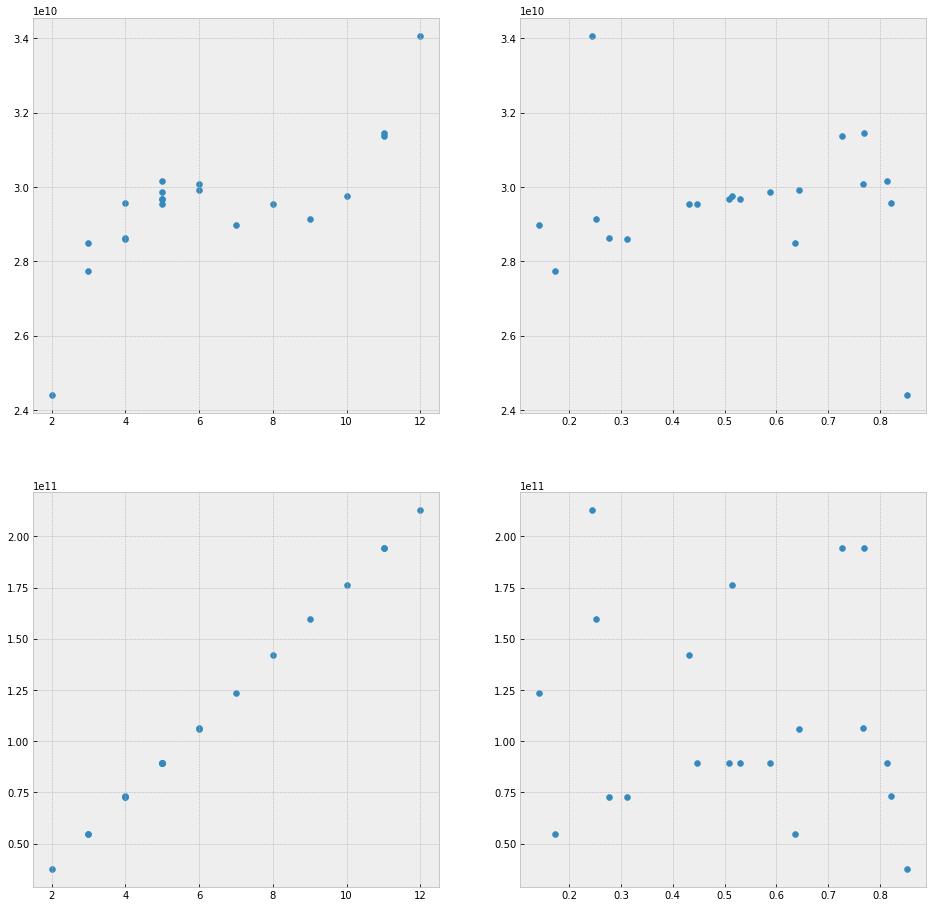

In [12]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

ax[0,0].scatter(inputs[inputs.columns[0]], outputs[outputs.columns[0]])
ax[0,1].scatter(inputs[inputs.columns[1]], outputs[outputs.columns[0]])
ax[1,0].scatter(inputs[inputs.columns[0]], outputs[outputs.columns[1]])
ax[1,1].scatter(inputs[inputs.columns[1]], outputs[outputs.columns[1]])

plt.show()

In [9]:
outputs

,Gas:Facility,Electricity:Facility
0,2.968323e+10,8.922011e+10
1,2.850135e+10,5.478828e+10
2,3.008186e+10,1.062774e+11
3,2.966997e+10,8.920811e+10
4,2.773895e+10,5.445550e+10
5,2.441006e+10,3.744015e+10
6,2.976077e+10,1.764383e+11
7,2.954896e+10,1.420428e+11
8,2.914954e+10,1.597730e+11
9,2.993192e+10,1.061411e+11


In [19]:
building.idfobjects

{'VERSION': [
 Version,
     9.0;                      !- Version Identifier
 ],
 'SIMULATIONCONTROL': [
 SimulationControl,
     Yes,                      !- Do Zone Sizing Calculation
     Yes,                      !- Do System Sizing Calculation
     Yes,                      !- Do Plant Sizing Calculation
     No,                       !- Run Simulation for Sizing Periods
     YES;                      !- Run Simulation for Weather File Run Periods
 ],
 'BUILDING': [
 Building,
     OfficeSmall,              !- Name
     0,                        !- North Axis
     City,                     !- Terrain
     0.04,                     !- Loads Convergence Tolerance Value
     0.2,                      !- Temperature Convergence Tolerance Value
     FullInteriorAndExterior,    !- Solar Distribution
     25,                       !- Maximum Number of Warmup Days
     6;                        !- Minimum Number of Warmup Days
 ],
 'SHADOWCALCULATION': [
 ShadowCalculation,
     AverageOv